The data from <a href="https://www.acbar.org/jobs" > ACBAR website</a> is scraped between June-Sept 2023 in eight rounds. <br>
The data contain the following variables: <br>
    1. **Location:** different provinces in Afghanistan <br>
    2. **Nationality:** national, international, both <br>
    3. **Job_Category:** different job categories such as business, health care, IT, security,...<br>
    4. **Employment Type:** Full Time, Part Time <br>
    5. **Gender:** Male, Female, both <br>
    6. **Years_OF_Experience:** Years of experience required <br>
    7: **Min_Education:** Minimum education required for each job position <br>
    8. **Name:** Title of the job position<br>
    
    
  For more information about <a href="https://www.acbar.org" > ACBAR website</a>

In [152]:
import pandas as pd

# We have 8 CSV files named 'round1.csv', 'round2.csv', ..., 'round8.csv'
# Therefore, we store the filenames in a list
file_names = ['RoundOne.csv', 'RoundTwo.csv', 'RoundThree.csv', 'RoundFour.csv', 'RoundFive.csv', 'RoundSix.csv', 'RoundSeven.csv', 'RoundEight.csv']

# Read the CSV files into DataFrames
data_frames = [pd.read_csv(file) for file in file_names]

# Merge the DataFrames
merged_df = pd.concat(data_frames)

# Reset the index if desired
merged_df = merged_df.reset_index(drop=True)

In [153]:
merged_df

,location,Nationality,job_Category,EmploymentType,gender,Experience_years,min Education,Name,KeySkills
0,Kabul,National,Business,Full Time,Male,8 years,BA,Position Title: Admin Finance Manager,NaN
1,Kabul,International,Business,Part Time,Any,8-12 years,MA,Position Title: Grant Coordinator/Proposal Wri...,NaN
2,Kabul,Any,Business,Part Time,Female,8-12 years,MA,Position Title: Grant Coordinator/Proposal Wri...,NaN
3,Herat,National,Program/Project,Full Time,Any,3 years,BA,Position Title: Reporting and Data Management ...,NaN
4,Herat,National,Program/Project,Full Time,Any,5 years,BA,Position Title: District Supervisors / Team Le...,NaN
...,...,...,...,...,...,...,...,...,...
2476,Parwan,National,Health Care,Full Time,Any,2 years,BA,Position Title: Medical Doctor (MD),NaN
2477,Parwan,National,Health Care,Full Time,Any,1 year,BA,Position Title: MHPSS Counselor,NaN
2478,Kandahar,National,Business,Full Time,Any,5 years,BA,Position Title: Human Resources Specialist NOC...,NaN
2479,Parwan,National,Health Care,Full Time,Any,1 year,HS,Position Title: Vaccinator,NaN


In [162]:
merged_df = merged_df.drop('KeySkills', axis=1)
#merged_df = merged_df.drop('Experience_Years', axis=1)


In [154]:
merged_df.columns

Index(['location', 'Nationality', 'job_Category', 'EmploymentType', 'gender',
       'Experience_years', 'min Education', 'Name', 'KeySkills'],
      dtype='object')

# Data Exploratory

In [155]:
#In order to make the column names consistent, we try to rename them
new_column_names = {'location': 'Location', 'Nationality': 'Nationality', 'job_Category': 'Job_Category', 
                   'EmploymentType': 'Employment_Type', 'gender': 'Gender', 'Experience_years': 'Years_Of_Experience',
                   'min Education': 'Minimum_Education', 'Name': 'Job_Title'}
merged_df = merged_df.rename(columns=new_column_names)

In [156]:
merged_df.columns

Index(['Location', 'Nationality', 'Job_Category', 'Employment_Type', 'Gender',
       'Years_Of_Experience', 'Minimum_Education', 'Job_Title', 'KeySkills'],
      dtype='object')

In [157]:
merged_df.isnull().sum()

Location                  0
Nationality               0
Job_Category              0
Employment_Type           0
Gender                    0
Years_Of_Experience       1
Minimum_Education         0
Job_Title                 0
KeySkills              1689
dtype: int64

In [163]:
missing_count = merged_df['Years_Of_Experience'].isnull().sum()
missing_count

0

In [164]:
missing_values = merged_df[merged_df['Years_Of_Experience'].isnull()]
missing_values

,Location,Nationality,Job_Category,Employment_Type,Gender,Years_Of_Experience,Minimum_Education,Job_Title


In [165]:
merged_df = merged_df.dropna(subset=['Years_Of_Experience'], axis=0)


In [166]:
merged_df

,Location,Nationality,Job_Category,Employment_Type,Gender,Years_Of_Experience,Minimum_Education,Job_Title
0,Kabul,National,Business,Full Time,Male,8 years,BA,Position Title: Admin Finance Manager
1,Kabul,International,Business,Part Time,Any,8-12 years,MA,Position Title: Grant Coordinator/Proposal Wri...
2,Kabul,Any,Business,Part Time,Female,8-12 years,MA,Position Title: Grant Coordinator/Proposal Wri...
3,Herat,National,Program/Project,Full Time,Any,3 years,BA,Position Title: Reporting and Data Management ...
4,Herat,National,Program/Project,Full Time,Any,5 years,BA,Position Title: District Supervisors / Team Le...
...,...,...,...,...,...,...,...,...
2476,Parwan,National,Health Care,Full Time,Any,2 years,BA,Position Title: Medical Doctor (MD)
2477,Parwan,National,Health Care,Full Time,Any,1 year,BA,Position Title: MHPSS Counselor
2478,Kandahar,National,Business,Full Time,Any,5 years,BA,Position Title: Human Resources Specialist NOC...
2479,Parwan,National,Health Care,Full Time,Any,1 year,HS,Position Title: Vaccinator


 There are 34 provinces in Afghanistan for location variable we have job ads from different provinces, for
better analysis we try to categorize the variable to zones to figure out the location varibale better. 

In [168]:
zone_mapping = {
    'Kabul Zone': ['Maidan Wardak', 'Logar', 'Kapisa', 'Parwan'],
    'Kabul City': 'Kabul',
    'North-Zone': ['Samangan', 'Baghlan', 'Balkh', 'Jawzjan', 'Faryab', 'Sar-e Pol', 'Sare Pol'],
    'West Zone': ['Badghis', 'Herat', 'Nimruz', 'Farah', 'Ghur', 'Ghowr'],
    'Central Highlands': ['Bamian', 'Daikondi', 'Ghazni'],
    'North-East Zone': ['Kunduz', 'Takhar', 'Badakhshan', 'Panjshir'],
    'South Zone': ['Helmand', 'Kandahar', 'Zabul', 'Oruzgan'],
    'East Zone': ['Laghman', 'Nangarhar', 'Paktia', 'Paktika', 'Khost', 'Nuristan', 'Kunar']
}

# Create a new column based on the mapping
merged_df['Location'] = merged_df['Location'].apply(lambda x: next((key for key, value in zone_mapping.items() if x in value), None))


In [169]:
#merged_df = merged_df.drop('Location_Zone', axis=1)
merged_df.head()


,Location,Nationality,Job_Category,Employment_Type,Gender,Years_Of_Experience,Minimum_Education,Job_Title
0,Kabul City,National,Business,Full Time,Male,8 years,BA,Position Title: Admin Finance Manager
1,Kabul City,International,Business,Part Time,Any,8-12 years,MA,Position Title: Grant Coordinator/Proposal Wri...
2,Kabul City,Any,Business,Part Time,Female,8-12 years,MA,Position Title: Grant Coordinator/Proposal Wri...
3,West Zone,National,Program/Project,Full Time,Any,3 years,BA,Position Title: Reporting and Data Management ...
4,West Zone,National,Program/Project,Full Time,Any,5 years,BA,Position Title: District Supervisors / Team Le...


In [170]:

merged_df.Location.value_counts()

Kabul City           1088
East Zone             345
North-Zone            269
West Zone             258
South Zone            174
North-East Zone       160
Central Highlands     105
Kabul Zone             81
Name: Location, dtype: int64

Most of job ads are advertised for **Kabul City**

For Job_Category variable also, we have different categories, for better analysis, we cateogrize the varibale to only Business, Education, Health, Engineering, Health, IT, Legal, Security, Agriculture, and others.

In [171]:
def categorize_job_title(job_title):
    if job_title in ['Business', 'Banking/Accounting', 'Communication', 'Customer Services', 'Hospitaity', 'Program/Project', 
                    'Purchasing-Procurement', 'Service', 'Supply Chain', 'Support', 'Professional services']:
        return 'Business'
    elif job_title in ['Education', 'Research']:
        return 'Education'
    elif job_title in ['Engineering', 'Construction', 'Design', 'Facilities']:
        return 'Engineering'
    elif job_title in ['Health', 'Pharmacy', 'Health Care', 'Pharmaceutical']:
        return 'Health'
    elif job_title == 'Information Technology':
        return 'IT'
    elif job_title == 'Legal':
        return 'Legal'
    elif job_title == 'Security':
        return 'Security'
    elif job_title == 'Agriculture':
        return 'Agriculture'
    else:
        return 'Others'

In [172]:
merged_df['Job_Category'] = merged_df['Job_Category'].apply(categorize_job_title)

In [174]:
merged_df.Job_Category.value_counts()

Business       1213
Health          512
Others          331
Education       135
Engineering     109
IT               61
Security         57
Agriculture      44
Legal            18
Name: Job_Category, dtype: int64

In [175]:
merged_df['Years_Of_Experience'] = merged_df['Years_Of_Experience'].str.replace(r'\b\d+\s*(?:-|\s)*\d*\s*(?:year|years)\b', '', regex=True)

merged_df['Years_Of_Experience'].unique()

array(['', '1-3 Years', '4-5 Years', '1 Year', 'None ', '3-4 Years',
       '5 Years', '7 Years', '2-3 Years', '3 Years', '2 Years', '8 Years',
       '4 Years', '05 Years', '4-6 Years', '1-2 Years', '2-', '1-',
       '02 Years', '8-12 Years', '8-12  Years', 'None', '6 Years', 'NOne',
       '3-4 Year', '1 Years', '3-5 Years', '10 Years', '2-4 Years',
       '7-8 Years', '7 Year', '2-5 Years', '10 Year', '5-6 Years',
       '3 Year'], dtype=object)

Years_Of_Experience varibale needs cleaning as we are not able to analyze it this way. So we extract 'year', get 
the avarage, convert it to numeric. 

In [176]:
merged_df.isna().sum()

Location               0
Nationality            0
Job_Category           0
Employment_Type        0
Gender                 0
Years_Of_Experience    0
Minimum_Education      0
Job_Title              0
dtype: int64

In [177]:
import re

# Extract the lower and upper bounds of the experience years range
def extract_years_range(years_range):
    bounds = re.findall(r'\d+', years_range)
    if len(bounds) == 2:
        return int(bounds[0]), int(bounds[1])
    else:
        return None

# Calculate the average of experience years
def calculate_average(years_range):
    bounds = extract_years_range(years_range)
    if bounds:
        lower_bound, upper_bound = bounds
        return (lower_bound + upper_bound) / 2
    else:
        return years_range

# Use the 'apply' function to calculate the average for each row of the 'experience_years' column
merged_df['Years_Of_Experience'] = merged_df['Years_Of_Experience'].apply(calculate_average)



In [178]:
merged_df['Years_Of_Experience'].unique()


array(['', 2.0, 4.5, '1 Year', 'None ', 3.5, '5 Years', '7 Years', 2.5,
       '3 Years', '2 Years', '8 Years', '4 Years', '05 Years', 5.0, 1.5,
       '2-', '1-', '02 Years', 10.0, 'None', '6 Years', 'NOne', '1 Years',
       4.0, '10 Years', 3.0, 7.5, '7 Year', '10 Year', 5.5, '3 Year'],
      dtype=object)

In [179]:
for index in range(len(merged_df["Years_Of_Experience"])):
    string = str(merged_df['Years_Of_Experience'].iat[index])
    if string.lower() == 'none' or string.lower() == 'n0ne' or string.lower() == 'None ':
        merged_df['Years_Of_Experience'].iat[index] = ''
    else:
        replace_years = string.replace('years', '')
        replace_Years = replace_years.replace('Years', '')
        replace_year = replace_Years.replace('year', '')
        replace_Year = replace_year.replace('Year', '')
        merged_df['Years_Of_Experience'].iat[index] = replace_Year
#merged_df["Years_Of_Experience"] = pd.to_numeric(merged_df["Years_Of_Experience"])
merged_df["Years_Of_Experience"].unique()

array(['', '2.0', '4.5', '1 ', 'None ', '3.5', '5 ', '7 ', '2.5', '3 ',
       '2 ', '8 ', '4 ', '05 ', '5.0', '1.5', '2-', '1-', '02 ', '10.0',
       '6 ', '4.0', '10 ', '3.0', '7.5', '5.5'], dtype=object)

In [185]:
merged_df['Years_Of_Experience'] = merged_df['Years_Of_Experience'].replace(['', 'None'], float('nan'))

median_value = merged_df['Years_Of_Experience'].median()
merged_df['Years_Of_Experience'] = merged_df['Years_Of_Experience'].fillna(median_value)


merged_df['Years_Of_Experience'] = pd.to_numeric(merged_df['Years_Of_Experience'], errors='coerce')

In [186]:

merged_df.isna().sum()

Location               0
Nationality            0
Job_Category           0
Employment_Type        0
Gender                 0
Years_Of_Experience    0
Minimum_Education      0
Job_Title              0
dtype: int64

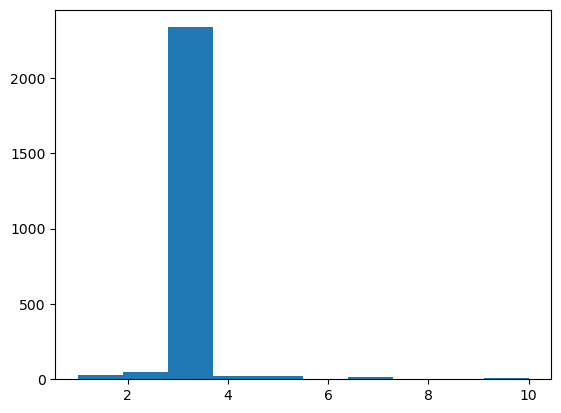

In [189]:
import matplotlib.pyplot as plt

plt.hist(merged_df['Years_Of_Experience'])
plt.show()